## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:
机器学习可以自动地学习出数据的规律，对每个特定的问题，都可以用泛化的方法进行解决。而构建复杂的模型公式不仅费时费力，也仅仅只可以解决某个特定的问题，不具备通用性。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:
1）得到好结果的随机性太大。
2）相同的循环步数，结果不够好。
3）结果不收敛，Loss不能逐渐下降，而是上下波动。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:
1）第2种方法比第1种方法好。
2）依赖于初始化的变量值，容易陷入局部最优的情况。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [3]:
import pandas as pd
import numpy as np
import random
import re
import math
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from collections import defaultdict

In [4]:
import requests

In [5]:
url_1 = 'http://www.bjsubway.com/station/zjgls/#'

In [6]:
response_1 = requests.get(url_1, allow_redirects=False)
response_1.encoding = 'gb2312'

In [7]:
pa_1 = re.compile(r">([\w*\u4e00-\u9fa5]+)..([\w*\u4e00-\u9fa5]+)<.*\s*.*>(\d+)<.*\s*.*>([\u4e00-\u9fa5]+/[\u4e00-\u9fa5]+|[\u4e00-\u9fa5]+)")
stations = pa_1.findall(response_1.text)

In [8]:
url_2 = 'https://www.cnblogs.com/tianlin106/p/7007511.html'

In [9]:
response_2 = requests.get(url_2, allow_redirects=False)
response_2.encoding = 'UTF-8'

In [10]:
pa_2 = re.compile(r">([\w*\u4e00-\u9fa5]+)<.*?>,(\d+.\d+),(\d+.\d+)")
locations = pa_2.findall(response_2.text)

In [11]:
locations

[('苹果园', '39.9263251384', '116.1777806282'),
 ('古城', '39.9072014648', '116.1902475357'),
 ('八角游乐园', '39.9074319023', '116.2128210068'),
 ('八宝山', '39.9072673042', '116.2358236313'),
 ('玉泉路', '39.9073331435', '116.2530326843'),
 ('五棵松', '39.9078269362', '116.2740182877'),
 ('万寿路', '39.9074319023', '116.2951755524'),
 ('公主坟', '39.9074319023', '116.3097667694'),
 ('军事博物馆', '39.9074648219', '116.3240146637'),
 ('木樨地', '39.9076294195', '116.3374471664'),
 ('南礼士路', '39.9072014648', '116.3525962830'),
 ('复兴门', '39.9071685451', '116.3565444946'),
 ('西单', '39.9074319023', '116.3742685318'),
 ('天安门西', '39.9074648219', '116.3917350769'),
 ('天安门东', '39.9077281779', '116.4016485214'),
 ('王府井', '39.9080244523', '116.4115619659'),
 ('东单', '39.9081890486', '116.4179134369'),
 ('建国门', '39.9085182400', '116.4358091354'),
 ('永安里', '39.9083865636', '116.4504861832'),
 ('国贸', '39.9091436994', '116.4619016647'),
 ('大望路', '39.9085182400', '116.4770936966'),
 ('四惠', '39.9087157541', '116.4954614639'),
 ('四惠东',

In [12]:
station_location = defaultdict()

In [13]:
for location in locations:
    st, long, lat = location
    station_location[st] = (float(long), float(lat))

In [14]:
station_location

defaultdict(None,
            {'苹果园': (39.926154, 116.1776546),
             '古城': (39.907436, 116.190598),
             '八角游乐园': (39.907401, 116.212686),
             '八宝山': (39.907437, 116.235718),
             '玉泉路': (39.907466, 116.253036),
             '五棵松': (39.907494, 116.274048),
             '万寿路': (39.907475, 116.295134),
             '公主坟': (39.907497, 116.310096),
             '军事博物馆': (39.907692, 116.321864),
             '木樨地': (39.907471, 116.337475),
             '南礼士路': (39.907254, 116.352627),
             '复兴门': (39.90723718, 116.3571631),
             '西单': (39.9072215, 116.3739083),
             '天安门西': (39.90748, 116.391666),
             '天安门东': (39.907791, 116.401565),
             '王府井': (39.90811, 116.41142),
             '东单': (39.908283, 116.418076),
             '建国门': (39.90860684, 116.4352424),
             '永安里': (39.90860684, 116.4352424),
             '国贸': (39.908506, 116.4601),
             '大望路': (39.90860514, 116.475794),
             '四惠': (39.90

In [15]:
connected_station = defaultdict(list)

In [16]:
for line in stations:
    if line[3] == '上行/下行':
        if line[0] not in connected_station[line[1]]:
            connected_station[line[1]].append(line[0])
        if line[1] not in connected_station[line[0]]:
            connected_station[line[0]].append(line[1])
    elif line[3] == '上行':
        if line[1] not in connected_station[line[0]]:
            connected_station[line[0]].append(line[1])
    elif line[3] == '下行':
        if line[0] not in connected_station[line[1]]:
            connected_station[line[1]].append(line[0])

In [17]:
connected_station

defaultdict(list,
            {'古城': ['苹果园', '八角游乐园'],
             '苹果园': ['古城'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东'],
             '四惠东': ['四惠', '高碑店'],
             '车公庄': ['西直门', '阜成门', '车公庄西'

In [18]:
station_graph = nx.Graph(connected_station)

NetworkXError: Node '物资学院路' has no position.

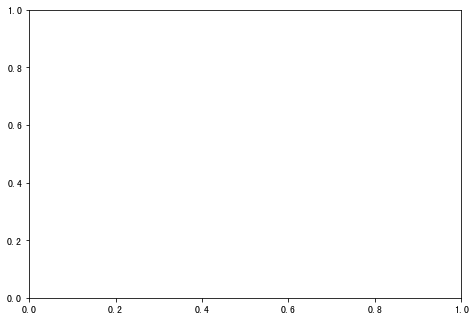

In [19]:
nx.draw(station_graph, station_location, with_labels=True, node_size=10)

In [29]:
def get_distance(station1, station2):
    for line in stations:
        if station1 in line and station2 in line:
            return float(line[2])
    return None

In [30]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes)

In [31]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [32]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [33]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_distance(path[i - 1], path[i]) 
        return distance

    return sorted(pathes, key=get_path_distnace)

In [34]:
search('奥体中心', '天安门东', connected_station, sort_candidate=shortest_path_first)

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '东四',
 '灯市口',
 '东单',
 '王府井',
 '天安门东']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因
